In [28]:
import json
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [66]:
with open(f"../../data/adversarial_vqa/adversarial_vqa_v1.json", "r") as fp:
    adv = json.load(fp)

In [71]:
adv = pd.DataFrame(adv)

sum(adv['method'] != "turker_provided")

805

In [42]:
def get_file_name(image_id, split="val"):
    split_map = {
        "train": "train2014",
        "val": "val2014",
        "test": "test2015"
    }
    return f"../../data/vqa/{split_map[split]}/COCO_{split_map[split]}_{image_id:012d}.jpg"

In [43]:
with open(f"../../data/vqa/v2_OpenEnded_mscoco_test2015_questions.json", "r") as fp:
    qs = pd.DataFrame(json.load(fp)["questions"])

In [44]:
with open(f"../itm_infer_base_vg_seed1_from_vlmo_base_patch16_2_20230317T2058_140205852294304.json", "r") as fp:
    res = json.load(fp)

with open(f"../itm_infer_base_vg_seed1_from_vlmo_base_patch16_2_20230317T2058_140530572017776.json", "r") as fp:
    res += json.load(fp)

In [50]:
full_res = {}

for batch in res:
    for k, v in batch.items():
        if k in full_res:
            full_res[k] += v
        else:
            full_res[k] = v

full_res = pd.DataFrame(full_res)

In [46]:
qs.head()

,image_id,question,question_id
0,262144,Is the ball flying towards the batter?,262144000
1,262144,What sport is this?,262144001
2,262144,Can you see the ball?,262144002
3,262144,Is the pitcher wearing a hat?,262144003
4,262144,Will he catch the ball in time?,262144004


In [51]:
full_res.head()

,itm_logits,itm_probs,iid,qid
0,"[1.8994140625, -1.994140625]","[0.86962890625, 0.11981201171875]",226050,226050000
1,"[0.4130859375, -0.44189453125]","[0.60205078125, 0.391357421875]",226050,226050002
2,"[2.19921875, -2.314453125]","[0.900390625, 0.08990478515625]",226050,226050004
3,"[1.4921875, -1.564453125]","[0.81640625, 0.1729736328125]",226050,226050006
4,"[2.240234375, -2.3359375]","[0.90380859375, 0.08819580078125]",226050,226050008


In [63]:
top5 = full_res[full_res['iid'] == 226050].sort_values(by=['itm_probs'], ascending=True).iloc[:5]

In [64]:
top5

,itm_logits,itm_probs,iid,qid
1,"[0.4130859375, -0.44189453125]","[0.60205078125, 0.391357421875]",226050,226050002
223900,"[0.479736328125, -0.5185546875]","[0.61767578125, 0.373291015625]",226050,226050007
671182,"[0.479736328125, -0.5185546875]","[0.61767578125, 0.373291015625]",226050,226050007
671181,"[0.96435546875, -1.00390625]","[0.72412109375, 0.26806640625]",226050,226050005
223899,"[0.96435546875, -1.00390625]","[0.72412109375, 0.26806640625]",226050,226050005


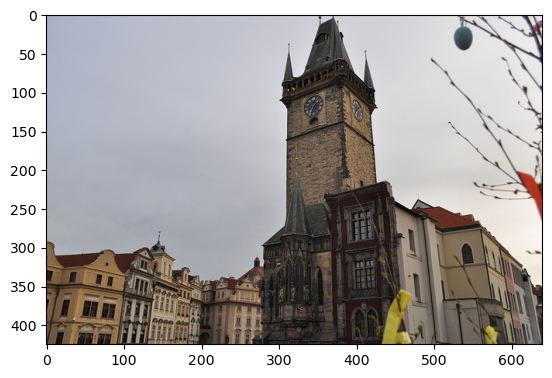

        image_id                      question  question_id
329182    226050  Is there any electric cable?    226050002
[0.60205078125, 0.391357421875]


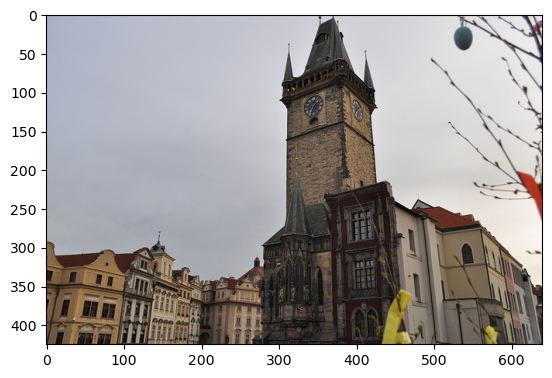

        image_id              question  question_id
329187    226050  Is the sky overcast?    226050007
[0.61767578125, 0.373291015625]


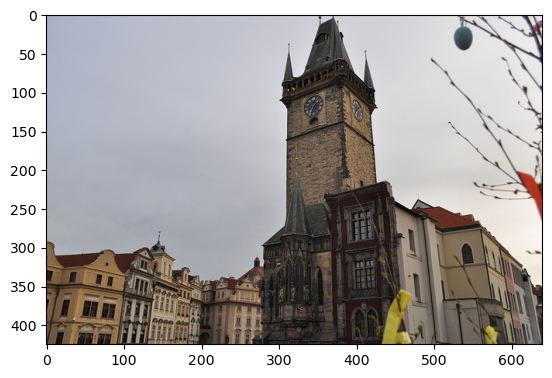

        image_id              question  question_id
329187    226050  Is the sky overcast?    226050007
[0.61767578125, 0.373291015625]


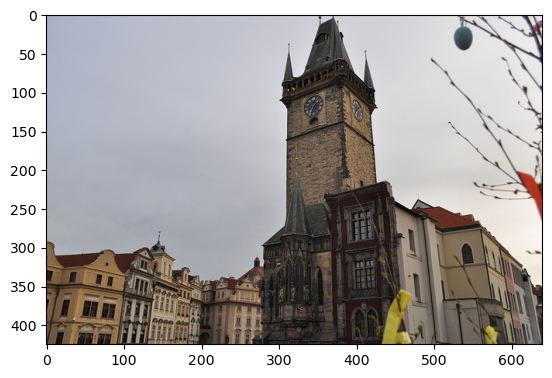

        image_id                                  question  question_id
329185    226050  How many clocks do you see on the tower?    226050005
[0.72412109375, 0.26806640625]


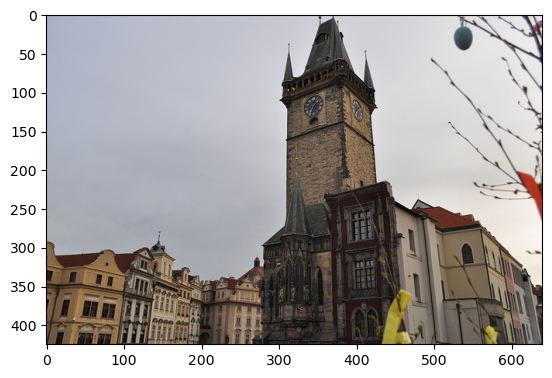

        image_id                                  question  question_id
329185    226050  How many clocks do you see on the tower?    226050005
[0.72412109375, 0.26806640625]


In [65]:
for _, r in top5.iterrows():
    img_fname = get_file_name(r['iid'], "test")
    q = qs[qs['question_id'] == r['qid']]
    probs = r['itm_probs']
    im = Image.open(img_fname).convert('RGB')
    plt.imshow(im)
    plt.show()
    print(q)
    print(probs)